In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
duration = 1.0
coeffs_longi = [3, 10, 0]
coeffs_lateral = [1, 1, 0]
x, y = 0, 0

t_values = 0.1 + np.linspace(0, 1.0 - 0.1, int(duration / 0.1) - 1)

# Evaluate polynomials using direct computation
longi_traj = np.polyval(coeffs_longi, (t_values))
lateral_traj = np.polyval(coeffs_lateral, (t_values))

# Stack waypoints
local_waypoints = np.stack([longi_traj, lateral_traj], axis=-1)

In [ ]:
plt.scatter(local_waypoints[:, 0], local_waypoints[:, 1])
plt.show()

In [ ]:
for _ in range(100):
    
    coeffs_longi = [random.uniform(-1, 1) for _ in range(3)]
    coeffs_longi[0] *= 3
    coeffs_longi[1] *= 30
    coeffs_longi[2] *= 0

    coeffs_lat= [random.uniform(-1, 1) for _ in range(3)]
    coeffs_lat[0] *= 1
    coeffs_lat[1] *= 5
    coeffs_lat[2] *= 0

    coeffs_longi[1] = max(0, coeffs_longi[1])

    # Evaluate polynomials using direct computation
    longi_traj = np.polyval(coeffs_longi, (t_values))
    lateral_traj = np.polyval(coeffs_lat, (t_values))

    # Stack waypoints
    local_waypoints = np.stack([longi_traj, lateral_traj], axis=-1)

    plt.scatter(local_waypoints[:, 0], local_waypoints[:, 1])
    plt.show()

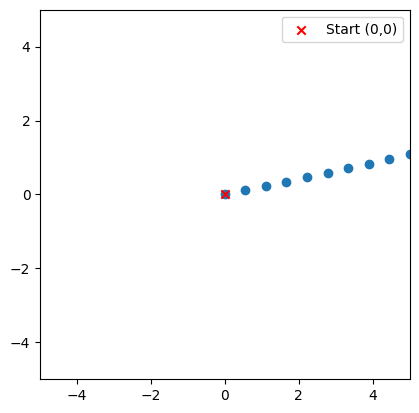

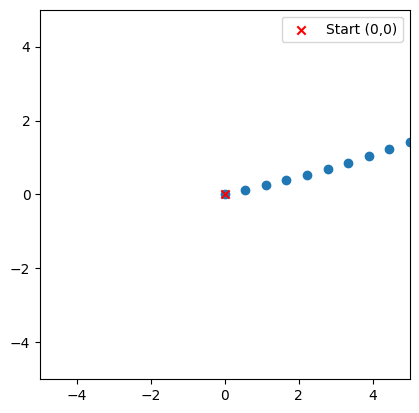

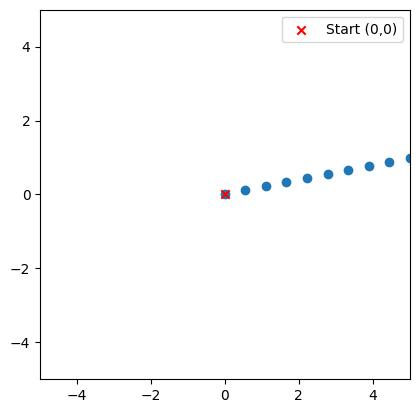

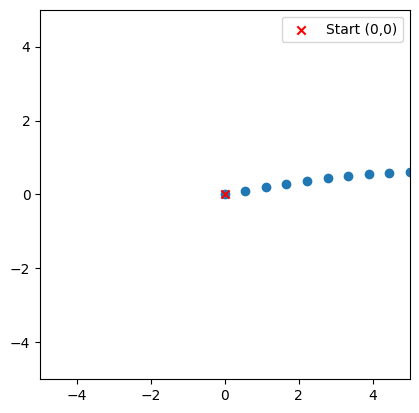

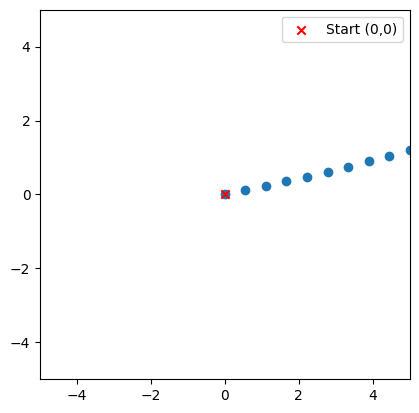

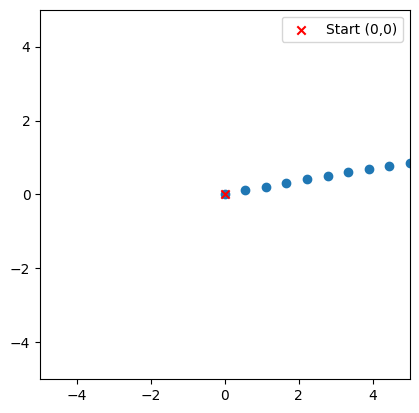

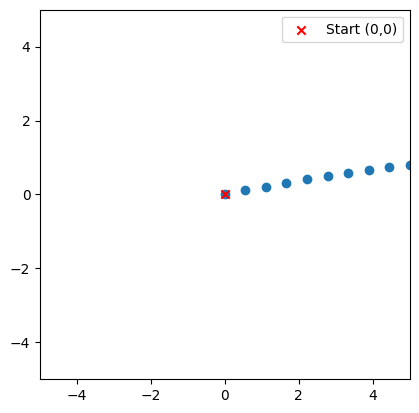

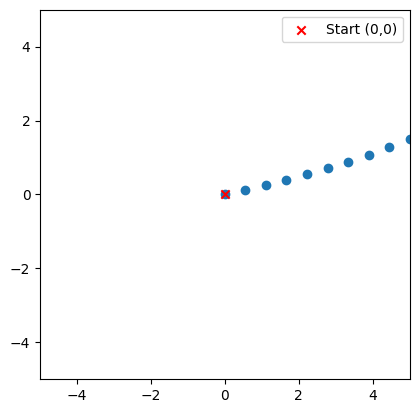

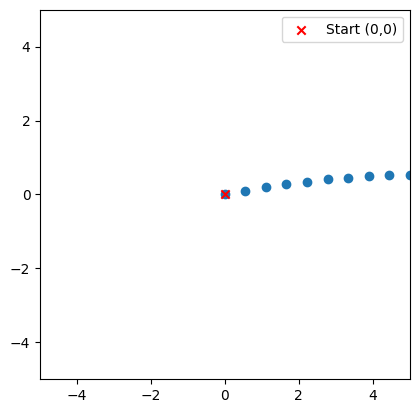

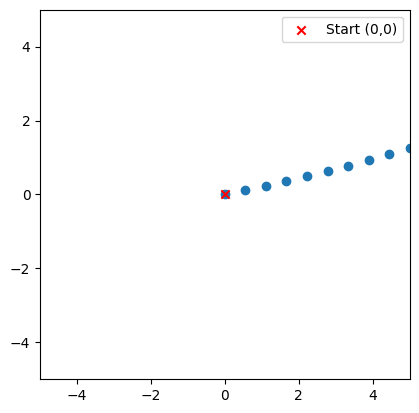

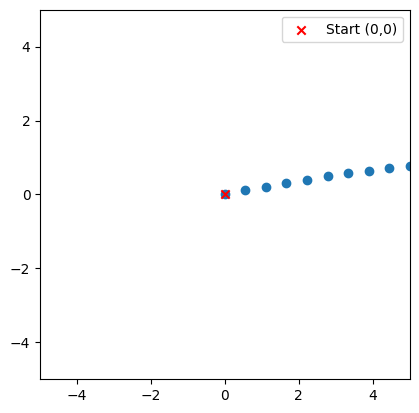

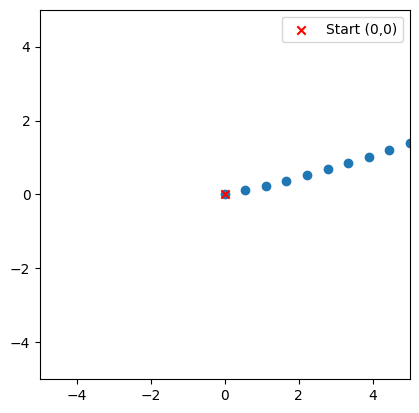

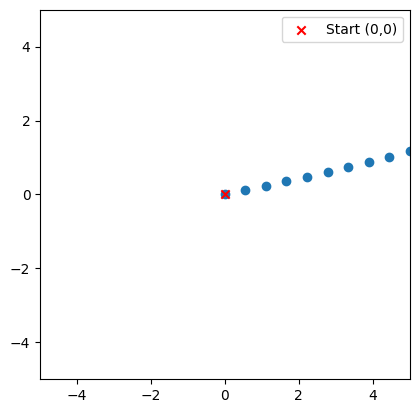

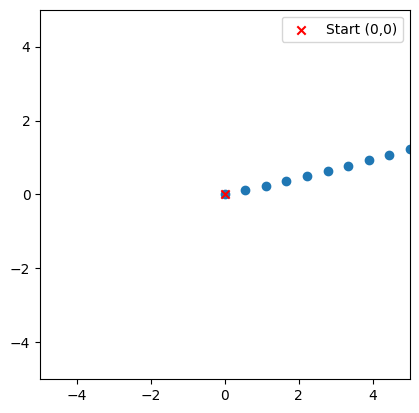

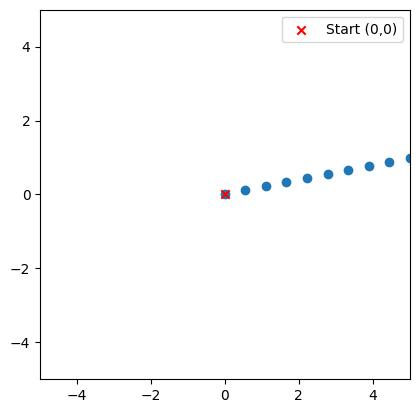

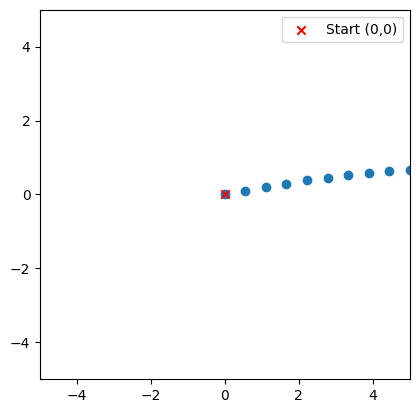

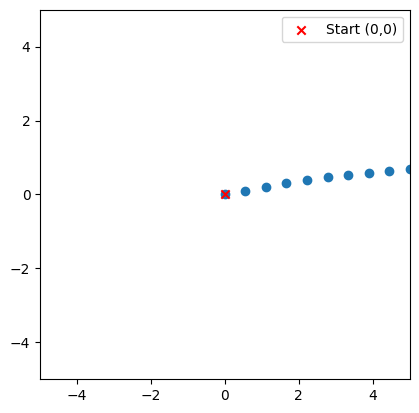

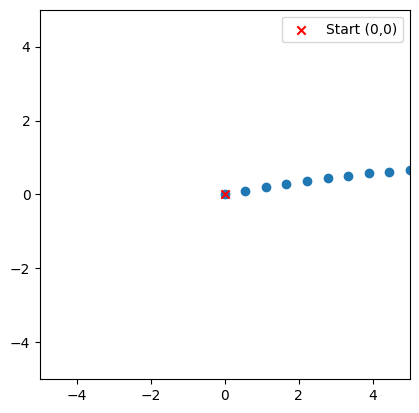

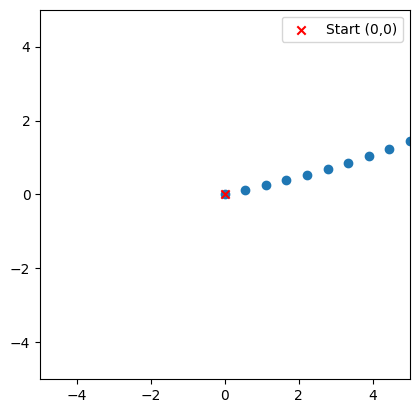

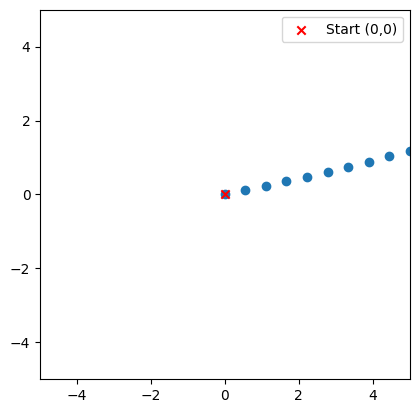

In [19]:
for _ in range(20):
    coeffs_longi = [random.uniform(-1, 1) for _ in range(3)]
    coeffs_longi[0] = -10
    coeffs_longi[1] = 5
    coeffs_longi[2] *= 0

    coeffs_lat = [random.uniform(-1, 1) for _ in range(3)]
    coeffs_lat[0] *= 0.5
    coeffs_lat[1] *= 1
    coeffs_lat[2] *= 0

    coeffs_longi[1] = max(0, coeffs_longi[1])
    coeffs_longi[0] = max(0, coeffs_longi[0])
    coeffs_lat[1] = min(1, coeffs_longi[1])

    # Evaluate polynomials
    longi_traj = np.polyval(coeffs_longi, t_values)
    lateral_traj = np.polyval(coeffs_lat, t_values)

    # Stack waypoints
    local_waypoints = np.stack([longi_traj, lateral_traj], axis=-1)

    plt.scatter(local_waypoints[:, 0], local_waypoints[:, 1])

    # --- Keep (0,0) at the center ---
    max_range = np.max(np.abs(local_waypoints))

    plt.xlim(-max_range, max_range)
    plt.ylim(-max_range, max_range)
    plt.gca().set_aspect('equal', adjustable='box')

    plt.scatter(0, 0, c='red', marker='x', label='Start (0,0)')
    plt.legend()
    plt.show()

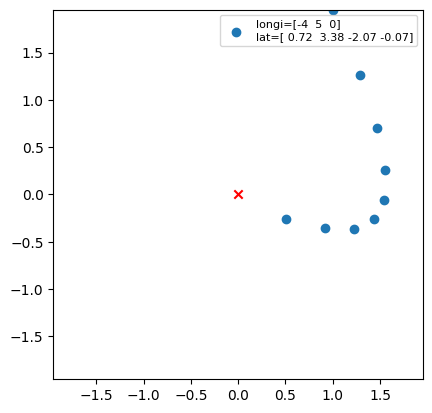

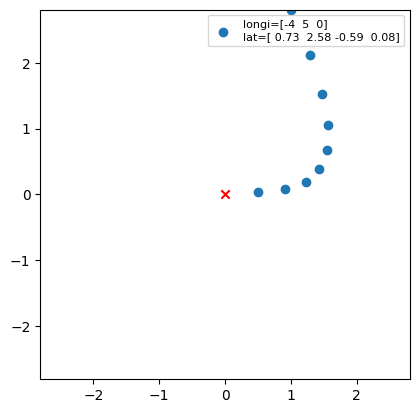

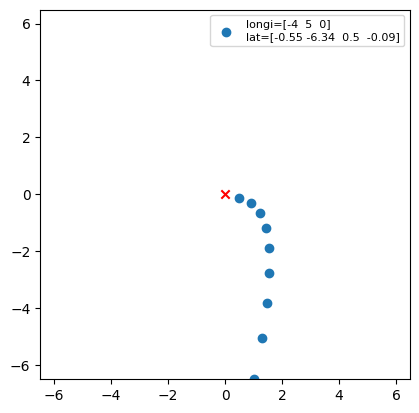

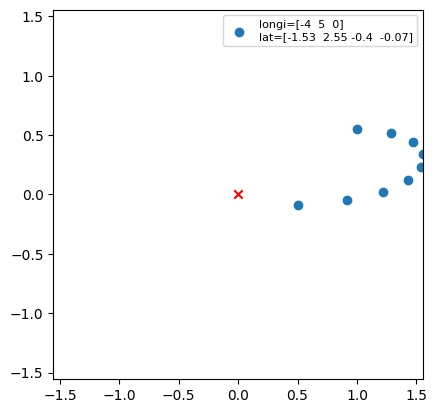

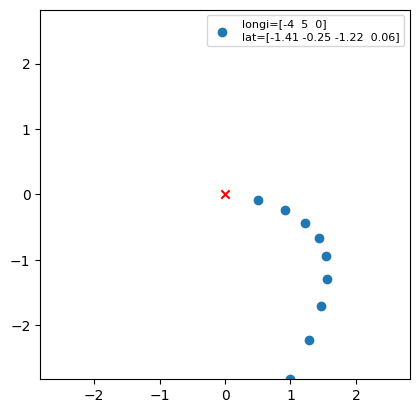

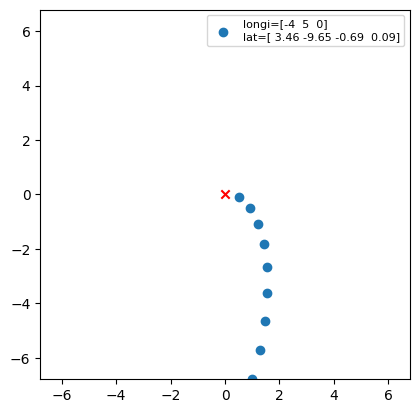

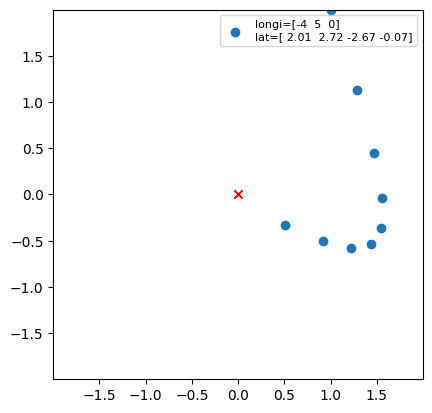

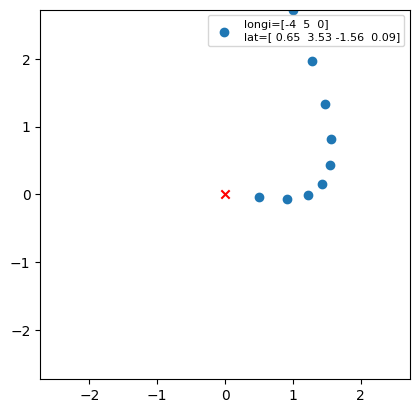

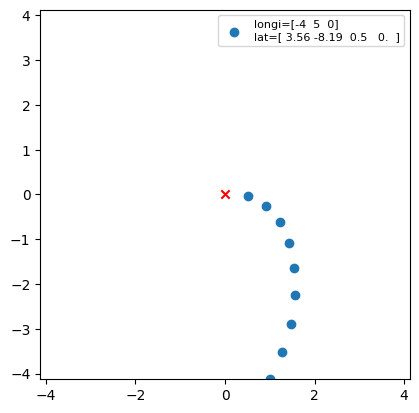

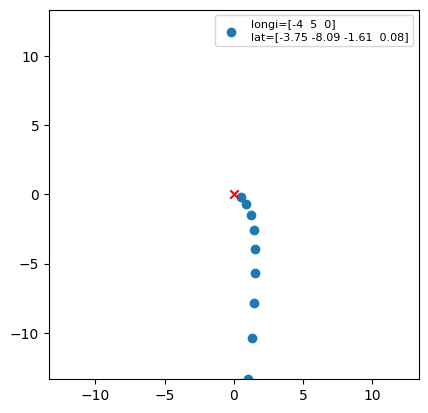

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import random

t_values = np.linspace(0, 1, 10)

for _ in range(10):
    coeffs_longi = [random.uniform(-1, 1) for _ in range(3)]
    coeffs_longi[0] = -4 # c2
    coeffs_longi[1] = 5 # c1
    coeffs_longi[2] = 0 # c0

    coeffs_lat = [random.uniform(-1, 1) for _ in range(4)]
    coeffs_lat[0] *= 4
    coeffs_lat[1] *= 10 # c2
    coeffs_lat[2] *= 3 # c1
    coeffs_lat[3] *= 0.1 # c0

    coeffs_lat[2] = min(coeffs_lat[2], 0.1 * coeffs_longi[1]) # min(1, coeffs_longi[1])  # <-- note: this line ties lateral slope to longitudinal

    # Evaluate polynomials
    longi_traj = np.polyval(coeffs_longi, t_values)
    lateral_traj = np.polyval(coeffs_lat, t_values)

    # Stack waypoints
    local_waypoints = np.stack([longi_traj, lateral_traj], axis=-1)

    # Plot
    plt.scatter(local_waypoints[1:, 0], local_waypoints[1:, 1],
                label=f"longi={np.round(coeffs_longi,2)}\nlat={np.round(coeffs_lat,2)}")

    # --- Keep (0,0) at the center ---
    max_range = np.max(np.abs(local_waypoints))
    plt.xlim(-max_range, max_range)
    plt.ylim(-max_range, max_range)
    plt.gca().set_aspect('equal', adjustable='box')

    plt.scatter(0, 0, c='red', marker='x')
    plt.legend(fontsize=8, loc="best")
    plt.show()


In [9]:
local_waypoints.shape

(10, 2)